In [1]:
import json 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:

def read_chunks(file, cols, chunk_size=500000):
    df = pd.read_json(
        f'/Users/ryounes/Documents/Feup/RecSNA_Project/yelp_academic_dataset_{file}.json', chunksize = chunk_size, lines=True)
    
    chunk_list = [chunk[cols] for chunk in df ]

    return pd.concat(chunk_list, ignore_index = True, join = 'outer', axis = 0)
    


In [3]:

business_json_path = '/Users/ryounes/Documents/Feup/RecSNA_Project/yelp_academic_dataset_business.json'
df_b = pd.read_json(business_json_path, lines=True)


In [4]:
df_u = read_chunks('user', ['user_id','name', 'friends','fans'])

In [5]:
df_u

,user_id,name,friends,fans
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52
3,SZDeASXq7o05mMNLshsdIA,Gwen,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1
...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,None,0
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,None,0
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,None,0
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,None,0


In [6]:
unique_cities = df_b['city'].unique()

# Print the unique cities
for city in unique_cities:
    print(city)

Santa Barbara
Affton
Tucson
Philadelphia
Green Lane
Ashland City
Brentwood
St. Petersburg
Nashville
Land O' Lakes
Tampa Bay
Indianapolis
Clearwater
Largo
New Orleans
Kenner
Edmonton
Reno
Newtown
White House
Boise
Paoli
Ardmore
Exton
Wilmington
Edwardsville
Sparks
Alton
Cherry Hill
Bala Cynwyd
Springfield
Belleville
Carmel
Tampa
Kennett Square
Plymouth Meeting
Harvey
West Chester
Meridian
Hudson
Fernley
Williamstown
Pinellas Park
Glenolden
Wesley Chapel
Fishers
Burlington
Troy
Camden
Plainfield
Bensalem
Maplewood
Saint Louis
Fairview Heights
Oro Valley
Treasure Island
Southampton
Chalfont
Willow Grove
Voorhees
Tarpon Springs
Blue Bell
Metairie
Woodbury
Brownsburg
Norristown
Land O Lakes
Greenwood
Saint Petersburg
Brookhaven
Haverford
Glenside
Moorestown
Madison
Ewing
Levittown
Gloucester Township
Aston
Riverview
Warrington
Wyncote
St. Louis
Havertown
Madeira Beach
Lutz
Langhorne
King of Prussia
Smithton
Jenkintown
New Port Richey
Avon
Normandy
Wayne
Franklin
Tuscon
Brandon
Berwyn
TAMPA


In [7]:
df_philadelphia_b = df_b[df_b['city']== 'Philadelphia']

In [8]:
df_r = read_chunks('review', ['review_id','user_id', 'business_id','stars'])

In [9]:
df_r

,review_id,user_id,business_id,stars
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4
...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5


In [10]:

philadelphia_business_ids = df_philadelphia_b['business_id']
df_r_philadelphia = df_r[df_r['business_id'].isin(philadelphia_business_ids)]
df_r_philadelphia

,review_id,user_id,business_id,stars
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1
13,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4
16,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5
...,...,...,...,...
6990257,tWCi4N2qCil876BI2NDAZg,5d32aJe0a3_fSl3LIVYkWQ,EmrOCT7fArKI0JI_XF6aaw,1
6990260,nLjbVsETpqO17RbFcqskkA,am7-gkH_PDz598oTdYSD6A,3gVSrS4kffGGZT8oXHsIcw,3
6990263,99ylx-qPUSseITqBye2MpA,-AkziDwQ8hv2COTDBBUpig,aunmz06iWvo3bd6MMHEbqg,3
6990265,KlHxcAifUF5zDKpJCBrRsw,7ziWZULyiZv2TesYNMFf4g,qQO7ErS_RAN4Vs1uX0L55Q,4


In [11]:
philadelphia_reviewed_user_ids = df_r_philadelphia['user_id'].unique()
df_u_philadelphia = df_u[df_u['user_id'].isin(philadelphia_reviewed_user_ids)]
# Extract friends' user IDs
friends_user_ids = df_u_philadelphia['friends'].explode().unique()

# Filter the user data frame again to include the users and their friends
df_u_philadelphia_and_friends = df_u[df_u['user_id'].isin(friends_user_ids)]


In [12]:

philadelphia_business_ids = df_philadelphia_b['business_id']
# Filter reviews for businesses in Philadelphia as you previously did
df_reviews_philadelphia = df_r[df_r['business_id'].isin(philadelphia_business_ids)]

# Extract unique user IDs who left reviews for businesses in Philadelphia
philadelphia_reviewed_user_ids = df_reviews_philadelphia['user_id'].unique()

# Filter the user data frame to include users who reviewed businesses in Philadelphia
df_users_philadelphia_reviewers = df_u[df_u['user_id'].isin(philadelphia_reviewed_user_ids)]

# Extract friends' user IDs from the filtered users
all_friends_user_ids = df_users_philadelphia_reviewers['friends'].str.split(', ').explode().unique()

# Filter the user data frame again to include the users and their friends
df_users_philadelphia_and_friends = df_u[df_u['user_id'].isin(all_friends_user_ids) | df_u['user_id'].isin(philadelphia_reviewed_user_ids)]


In [13]:
df_users_philadelphia_and_friends

,user_id,name,friends,fans
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52
3,SZDeASXq7o05mMNLshsdIA,Gwen,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28
5,q_QQ5kBBwlCcbL1s4NVK3g,Jane,"xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357
...,...,...,...,...
1987832,iZ0puydkFQlaSQAXbGtv1g,Dr. Sylvia,None,0
1987834,XTWARBzLbiJKQ1JeJB9f3g,Sakina,None,0
1987859,K-BNvWUCWEGUuBirCU4mmg,Jodi,None,0
1987862,cu_xPeMTm8qsWShBIHJeuw,Susan,None,0


In [24]:
!pip install python-igraph


DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Obtaining dependency information for python-igraph from https://files.pythonhosted.org/packages/5d/f4/d7d8b02c6d40b9fe71fd7d57b9178cc9527c3bbdd252a6df3cc9fa83a3c8/python_igraph-0.10.8-py3-none-any.whl.metadata
  Obtaining dependency information for igraph==0.10.8 from https://files.pythonhosted.org/packages/38/d8/0abcc30c61d60fdd460677b3ca1d6ac16f4a657d50eea8f461da76396e27/igraph-0.10.8-cp39-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.5 MB/s eta 0:00:00a 0:00:01


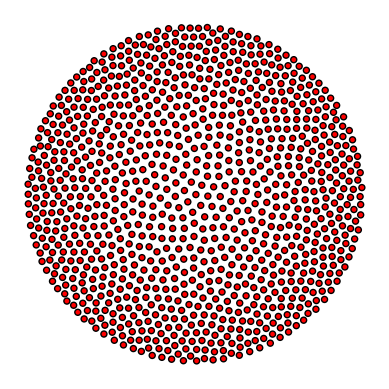

In [31]:

import pandas as pd
import igraph as ig
ig.config['plotting.backend'] = 'matplotlib'
df_u_graph = df_users_philadelphia_and_friends.head(1000)
# Create an empty directed graph to represent the user-user network
# Check if 'user_id' column exists in the DataFrame
if 'user_id' in df_u_graph.columns:
    # Create an empty undirected graph to represent the user-user network with mutual relations
    user_graph = ig.Graph()
    
    # Add users as vertices to the graph
    user_graph.add_vertices(df_u_graph['user_id'].tolist())
    
    # Iterate through user data to add edges (mutual friendships) to the graph
    for _, row in df_u_graph.iterrows():
        user_id = row['user_id']
        friends = row['friends']
        
        # Check if each friend is also in the user data and create an undirected edge
        for friend_id in friends:
            if friend_id in df_u_graph['user_id'].values:
                user_graph.add_edge(user_id, friend_id)
    
    # Visualize the user-user network graph (optional)
    layout = user_graph.layout_fruchterman_reingold()
    ig.plot(user_graph, layout=layout, vertex_size=1, bbox=(800, 800), margin=20, target='user_user_graph.png')
else:
    print("The 'user_id' column does not exist in the DataFrame.")


In [34]:
df_users_philadelphia_and_friends

,user_id,name,friends,fans
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52
3,SZDeASXq7o05mMNLshsdIA,Gwen,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28
5,q_QQ5kBBwlCcbL1s4NVK3g,Jane,"xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357
...,...,...,...,...
1987832,iZ0puydkFQlaSQAXbGtv1g,Dr. Sylvia,None,0
1987834,XTWARBzLbiJKQ1JeJB9f3g,Sakina,None,0
1987859,K-BNvWUCWEGUuBirCU4mmg,Jodi,None,0
1987862,cu_xPeMTm8qsWShBIHJeuw,Susan,None,0
